In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':16,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [82]:
# Leer datos de farmacias en Comunidad de Madrid
farma = pd.read_csv('201911_oficinas_farmacia.csv',encoding = 'iso-8859-1', delimiter = ';')

farma.head()

,farmacia_nro_soe,titular_nombre,direccion_vial_tipo,direccion_vial_nombre,direccion_vial_nro,municipio_nombre,localizacion_coordenada_x,localizacion_coordenada_y
0,2,Mª Del Pilar Corral Palomino,PLAZA,del Dos de Mayo,6,Madrid,440267.0,4475426.0
1,3,Montserrat Gimenez Mestre,CALLE,de Ríos Rosas,50,Madrid,440954.0,4477004.0
2,4,Justo Aquilino Corral Aragon,CALLE,de Argensola,12,Madrid,441063.0,4475193.0
3,5,Irene Arroita Del Campo,CALLE,de Alcalá,98,Madrid,442754.0,4475148.0
4,6,Esther Sansi Ponsico,PLAZA,de Salesas,7,Madrid,441090.0,4475021.0


In [85]:
# Numero de farmacias por municipio
num_farma = farma.groupby('municipio_nombre')['farmacia_nro_soe'].count().reset_index()
num_farma.head(5)

,municipio_nombre,farmacia_nro_soe
0,Ajalvir,1
1,Alameda del Valle,1
2,"Alamo, El",1
3,Alcalá de Henares,69
4,Alcobendas,38


In [87]:
# total de farmacias
num_farmacias = num_farma['farmacia_nro_soe'].sum()
num_farmacias

2875

In [88]:
# media de habitantes por farmacia
hab_cm = 6662000
hab_farmacia = hab_cm/num_farmacias
int(hab_farmacia)

2317

In [89]:
# Leer datos de municipios de la Comunidad de Madrid
muni = pd.read_csv('201911_municipio_comunidad_madrid.csv',encoding = 'iso-8859-1', delimiter = ';')
muni.drop(muni.columns[[0,2,3,4]], inplace=True, axis=1)
muni.head()

,municipio_nombre,superficie_km2,densidad_por_km2
0,Acebeda (La),21.86,3.02
1,Ajalvir,19.80,225.00
2,Alameda del Valle,25.70,7.74
3,Alamo (El),22.00,415.86
4,Alcalá de Henares,88.11,2205.31


In [90]:
muni.count()

municipio_nombre    179
superficie_km2      179
densidad_por_km2    179
dtype: int64

In [91]:
def renombra(row):
    nombre = row['municipio_nombre']
    if '(La)' in nombre:
        nuevo_nombre = nombre[0:len(nombre)-5] +', La'
    elif '(El)' in nombre:
        nuevo_nombre = nombre[0:len(nombre)-5] +', El'
    elif '(Los)' in nombre:
        nuevo_nombre = nombre[0:len(nombre)-6] +', Los'
    elif '(Las)' in nombre:
        nuevo_nombre = nombre[0:len(nombre)-6] +', Las'
    else:
        nuevo_nombre = nombre
    return nuevo_nombre.strip()

muni['municipio_nombre'] = muni.apply (lambda row: renombra(row), axis=1)

In [92]:
resul= pd.merge(num_farma, muni, on='municipio_nombre', how='right')
resul.head()

,municipio_nombre,farmacia_nro_soe,superficie_km2,densidad_por_km2
0,Ajalvir,1.0,19.80,225.00
1,Alameda del Valle,1.0,25.70,7.74
2,"Alamo, El",1.0,22.00,415.86
3,Alcalá de Henares,69.0,88.11,2205.31
4,Alcobendas,38.0,45.24,2538.99


In [93]:
resul['farmacia_nro_soe'] = resul['farmacia_nro_soe'].fillna(0)
resul['hab_farmacia']= resul['superficie_km2']*resul['densidad_por_km2']/resul['farmacia_nro_soe']
resul['hab_farmacia_1']= resul['superficie_km2']*resul['densidad_por_km2']/(resul['farmacia_nro_soe']+1)
resul = resul[resul['hab_farmacia'] < 10000].sort_values(by=['hab_farmacia'],ascending=False)
resul.to_csv('resul.csv', encoding = 'UTF-8', sep = ',')

In [94]:
resul[resul['farmacia_nro_soe'] == 0]['municipio_nombre'].count()

0

In [95]:
resul[resul['farmacia_nro_soe'] == 1]['municipio_nombre'].count()

85

In [97]:
resul[resul['municipio_nombre'] == 'Madrid']

,municipio_nombre,farmacia_nro_soe,superficie_km2,densidad_por_km2,hab_farmacia,hab_farmacia_1
69,Madrid,1815.0,604.66,5264.08,1753.707225,1752.741527


In [98]:
resul[resul['farmacia_nro_soe'] >= 10]['hab_farmacia'].mean()

3183.8450320512497

In [99]:
resul.head(20)['hab_farmacia'].mean()

6194.520881833333

In [100]:
resul20 = resul.head(20)

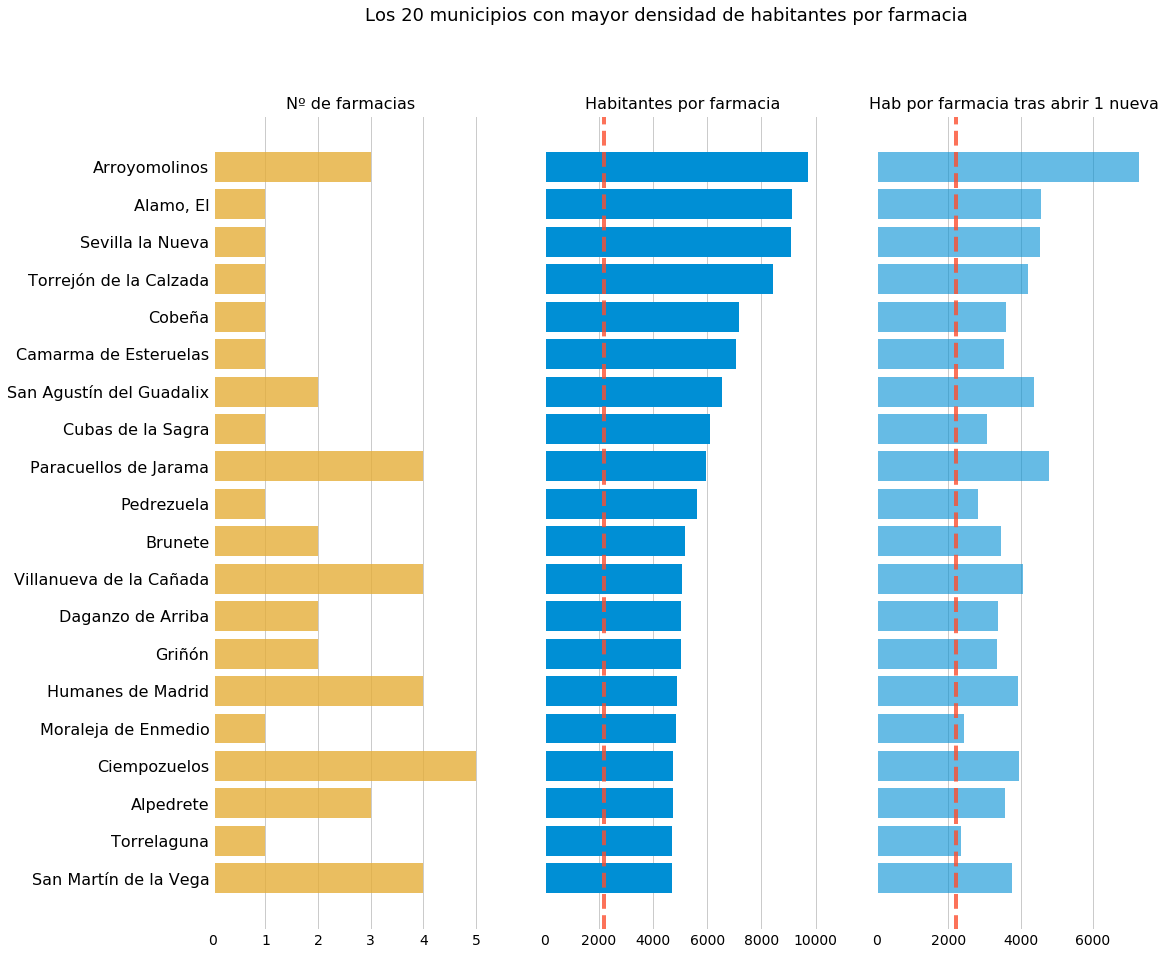

In [101]:
# Gráfico de densidad de farmacias por municipios

fig, (ax1,ax2,ax3 ) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
fig.suptitle('Los 20 municipios con mayor densidad de habitantes por farmacia',fontsize= 18)

x = resul20['municipio_nombre']
y1 = resul20['farmacia_nro_soe']
y2 = resul20['hab_farmacia']
y3 = resul20['hab_farmacia_1']

ax1.barh(x, y1, alpha=0.8, color=sns.color_palette()[2])
ax2.barh(x, y2, alpha=1, color=sns.color_palette()[0])
ax3.barh(x, y3, alpha=0.6, color=sns.color_palette()[0])

plt.gca().invert_yaxis()

ax1.grid(axis='x')
ax2.grid(axis='x')
ax3.grid(axis='x')

ax2.axvline(x=2200, ls='--', alpha=0.8, color=sns.color_palette()[1])
ax3.axvline(x=2200, ls='--', alpha=0.8, color=sns.color_palette()[1])

ax1.set_title('Nº de farmacias',fontsize= 16)
ax2.set_title('Habitantes por farmacia',fontsize= 16)
ax3.set_title('Hab por farmacia tras abrir 1 nueva',fontsize= 16)

plt.savefig('images/farmacias_hab.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()